The solution is 
 [13, 2, 11, 1, 8, 3, 14, 10, 9, 6, 5, 0, 7, 4, 12] 
The path length is 
 293.6481691707029


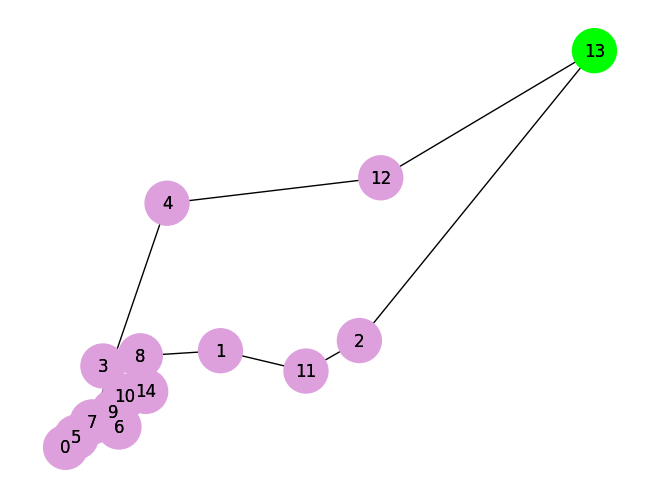

In [ ]:
def graph(coordinate):
    final_solution = hill_climbing(coordinate)
    G = nx.DiGraph()

    # Add nodes for all city coordinates
    for i, (x, y) in enumerate(coordinate):
        G.add_node(i, pos=(x, y))

    # Add edges based on the final solution
    temp = final_solution[1]
    for i in range(1, len(temp)):
        G.add_edge(temp[i - 1], temp[i])
    G.add_edge(temp[len(temp) - 1], temp[0])

    pos = nx.get_node_attributes(G, 'pos')

    # Create a color map to distinguish the start and end nodes
    color_map = []
    for node in G:
        if node == temp[0]:
            color_map.append('lime')
        else:
            color_map.append('plum')

    nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=1000, arrows=False)
    nx.draw_networkx_labels(G, pos)

    print("The solution is \n", final_solution[1], "\nThe path length is \n", final_solution[0])

graph(coordinate)

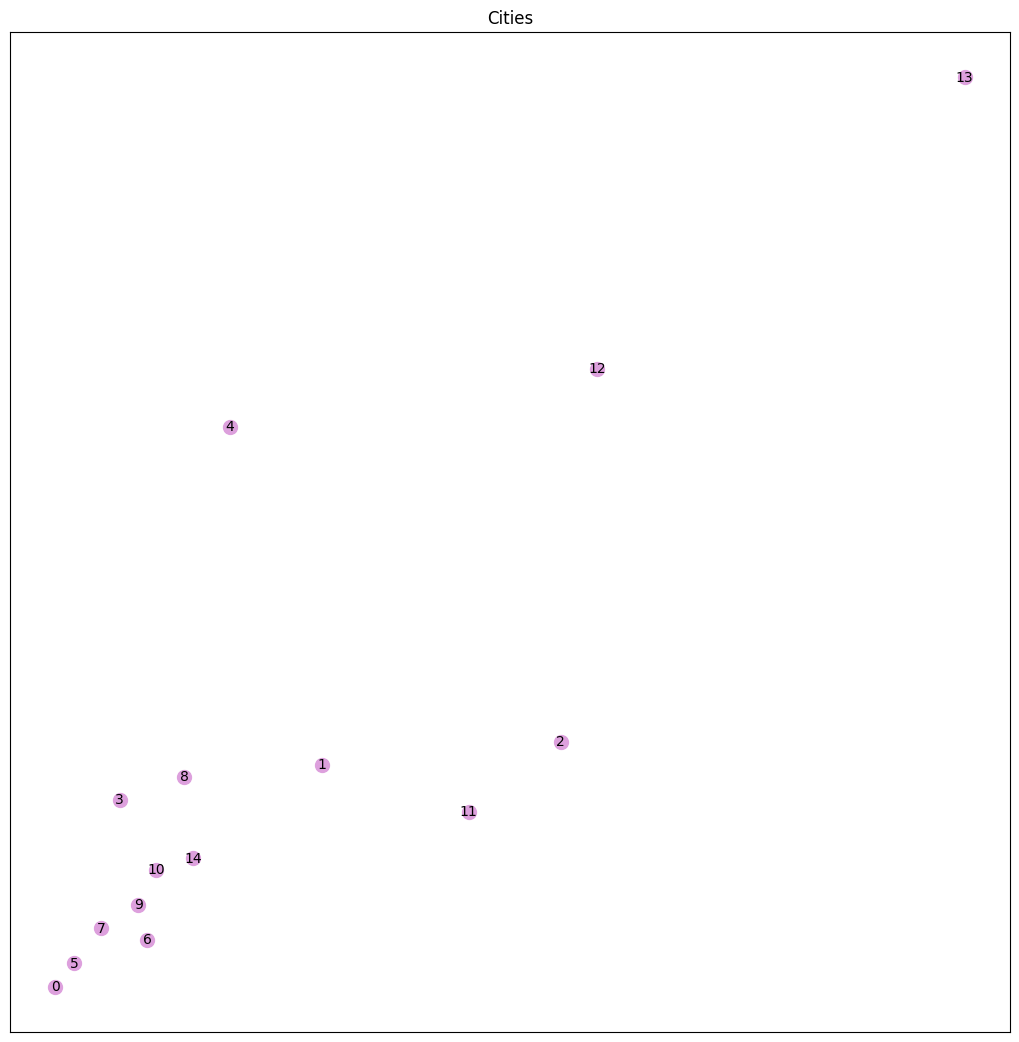

Enter the start city (0-14): 5
Enter the end city (0-14): 9
Enter the start city (0-14): 5
Enter the end city (0-14): 9


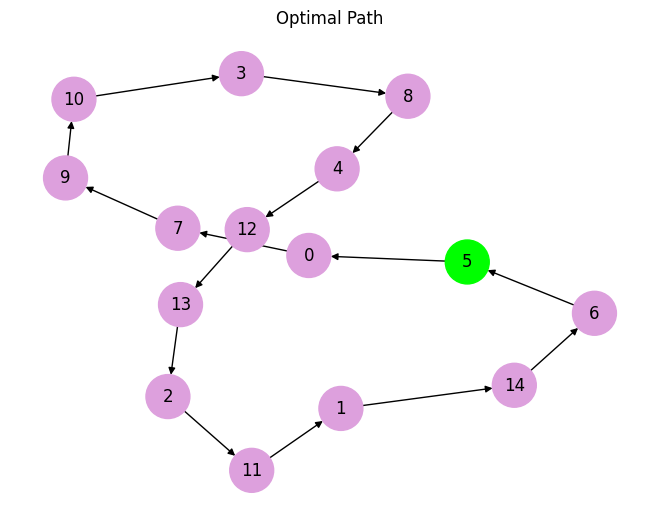

The solution is 
 [10, 3, 8, 4, 12, 13, 2, 11, 1, 14, 6, 5, 0, 7, 9] 
The path length is 
 283.4977240771657


In [ ]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# City coordinates
coordinate = np.array([[1,2], [30,21], [56,23], [8,18], [20,50], [3,4], [11,6], [6,7],
                       [15,20], [10,9], [12,12], [46,17], [60,55], [100,80], [16,13]])

def display_cities(coordinate):
    G = nx.Graph()

    for i, (x, y) in enumerate(coordinate):
        G.add_node(i, pos=(x, y))

    pos = nx.get_node_attributes(G, 'pos')

    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=False, node_size=100, node_color='plum', edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

    plt.title("Cities")
    plt.axis('on')
    plt.show()

def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)):
            p = np.linalg.norm(coordinate[i] - coordinate[j])
            matrix.append(p)
    matrix = np.reshape(matrix, (len(coordinate), len(coordinate)))
    return matrix

def solution(matrix):
    points = list(range(0, len(matrix)))
    start_city = int(input("Enter the start city (0-14): "))
    end_city = int(input("Enter the end city (0-14): "))
    if start_city == end_city:
        return [start_city]
    points.remove(start_city)
    points.remove(end_city)
    solution = [start_city]
    while points:
        random_point = points[random.randint(0, len(points) - 1)]
        solution.append(random_point)
        points.remove(random_point)
    solution.append(end_city)
    return solution

def path_length(matrix, solution):
    cycle_length = 0
    for i in range(len(solution)):
        cycle_length += matrix[solution[i - 1]][solution[i]]
    return cycle_length

def neighbors(matrix, solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)

    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)

    for neighbor in neighbors:
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path

def hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)

    current_solution = solution(matrix)
    current_path = path_length(matrix, current_solution)
    neighbor = neighbors(matrix, current_solution)[0]
    best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    while best_neighbor_path < current_path:
        current_solution = best_neighbor
        current_path = best_neighbor_path
        neighbor = neighbors(matrix, current_solution)[0]
        best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    return current_path, current_solution

def graph(coordinate, start_city, end_city):
    final_solution = hill_climbing(coordinate)
    G = nx.DiGraph()
    temp = final_solution[1]
    G.add_nodes_from(final_solution[1])

    for i in range(1, len(final_solution[1])):
        G.add_edge(temp[i - 1], temp[i])
    G.add_edge(temp[len(temp) - 1], temp[0])
    color_map = []
    for node in G:
        if node == start_city:
            color_map.append('lime')
        else:
            color_map.append('plum')
    nx.draw(G, with_labels=True, node_color=color_map, node_size=1000)
    plt.title("Optimal Path")
    plt.show()

    print("The solution is \n", final_solution[1], "\nThe path length is \n", final_solution[0])

display_cities(coordinate)
start_city = int(input("Enter the start city (0-14): "))
end_city = int(input("Enter the end city (0-14): "))
graph(coordinate, start_city, end_city)


Weighted-Graph Model :


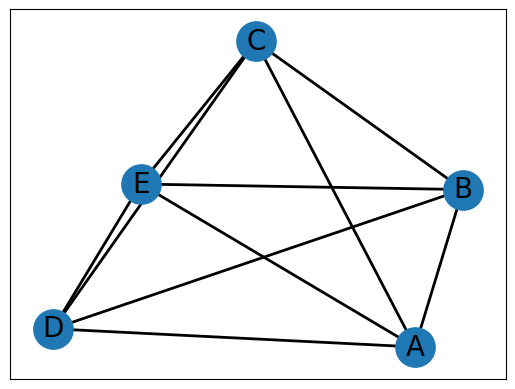

Initial Route :


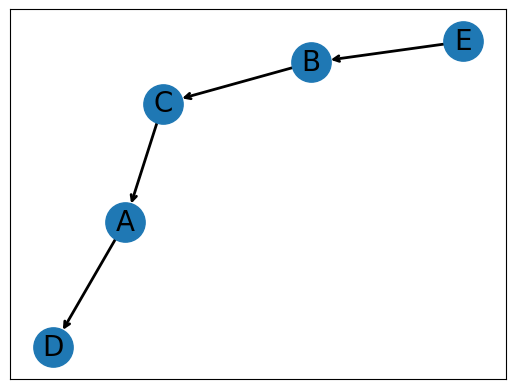

Cost : 18

--------------- Hill-Climbing ---------------
Initial Route :  ['E', 'B', 'C', 'A', 'D'] Cost :  18
Iteration :  1
Path :  ['B', 'E', 'C', 'A', 'D'] Cost :  21
Path :  ['C', 'B', 'E', 'A', 'D'] Cost :  25
Path :  ['A', 'B', 'C', 'E', 'D'] Cost :  34
Path :  ['D', 'B', 'C', 'A', 'E'] Cost :  28
Path :  ['E', 'C', 'B', 'A', 'D'] Cost :  30
Path :  ['E', 'A', 'C', 'B', 'D'] Cost :  28
Path :  ['E', 'D', 'C', 'A', 'B'] Cost :  22
Path :  ['E', 'B', 'A', 'C', 'D'] Cost :  21
Path :  ['E', 'B', 'D', 'A', 'C'] Cost :  17
New Initial Route :  ['E', 'B', 'D', 'A', 'C'] Cost :  17
Path :  ['E', 'B', 'C', 'D', 'A'] Cost :  19

Initial Route :  ['E', 'B', 'D', 'A', 'C'] Cost :  17
Iteration :  2
Path :  ['B', 'E', 'D', 'A', 'C'] Cost :  16
New Initial Route :  ['B', 'E', 'D', 'A', 'C'] Cost :  16
Path :  ['D', 'B', 'E', 'A', 'C'] Cost :  25
Path :  ['A', 'B', 'D', 'E', 'C'] Cost :  33
Path :  ['C', 'B', 'D', 'A', 'E'] Cost :  27
Path :  ['E', 'D', 'B', 'A', 'C'] Cost :  25
Path :  ['E',

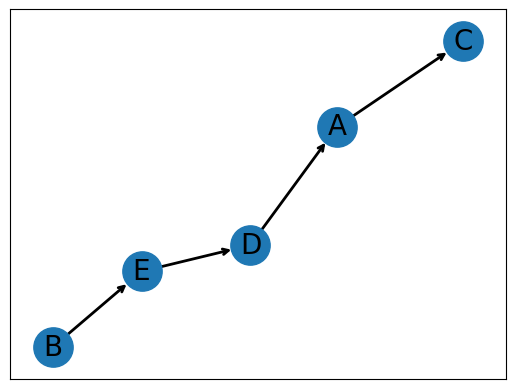

Cost :  16


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Weighted Graph Model
print('Weighted-Graph Model :')
G = nx.Graph()

G.add_edge('A', 'B', weight = 9)
G.add_edge('A', 'C', weight = 3)
G.add_edge('A', 'D', weight = 2)
G.add_edge('A', 'E', weight = 10)
G.add_edge('B', 'C', weight = 8)
G.add_edge('B', 'D', weight = 7)
G.add_edge('B', 'E', weight = 5)
G.add_edge('C', 'D', weight = 4)
G.add_edge('C', 'E', weight = 11)
G.add_edge('D', 'E', weight = 6)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size = 800)
nx.draw_networkx_edges(G, pos, width = 2)
nx.draw_networkx_labels(G, pos, font_size = 20, font_family = 'sans-serif')

plt.axis('on')
plt.show()

#Initial Route
print('Initial Route :')
I = nx.DiGraph()

I.add_edges_from([('E', 'B'), ('B', 'C'), ('C', 'A'), ('A', 'D')])

pos = nx.spring_layout(I)

nx.draw_networkx_nodes(I, pos, node_size = 800)
nx.draw_networkx_edges(I, pos, node_size = 800, arrowstyle = '->', arrowsize = 10, width = 2)
nx.draw_networkx_labels(I, pos, font_size = 20, font_family = 'sans-serif')

plt.axis('on')
plt.show()
print('Cost : 18')
print()

# Hill Climbing
print("--------------- Hill-Climbing ---------------")
cost = [[0, 9, 3, 2, 10], [9, 0, 8, 7, 5], [3, 8, 0, 4, 11], [2, 7, 4, 0, 6], [10, 5, 11, 6, 0]]
init = ['E', 'B', 'C', 'A', 'D']
new = init.copy()
base = 18
i = 0
count = 0
loop = 1
itr = 1
while(loop):
    loop = 0
    temp = init.copy()
    print("Initial Route : ", init, "Cost : ",base)
    print("Iteration : ", itr)

    while(i < 5):
        for j in range(i, 5):
            if(i == j):
                continue
            tempPath = init[i]
            init[i] = init[j]
            init[j] = tempPath

            for x in range(0,4):
                count = count + cost[ord(init[x])-65][ord(init[x+1])-65]
#                 print(count)

            print("Path : ", init, "Cost : ", count)

            if(count < base):
                new = init
                base = count
                print("New Initial Route : ", new, "Cost : ", base)
                loop = 1

            count = 0
            init = temp.copy()

        i+=1

    print()
    init = new.copy()
    itr += 1
    i = 0

# Final Route
print("Final Route : ")
T = nx.DiGraph()
T.add_edges_from([(init[0], init[1]), (init[1], init[2]), (init[2], init[3]), (init[3], init[4])])

posnew = nx.spring_layout(T)

nx.draw_networkx_nodes(T, posnew, node_size = 800)
nx.draw_networkx_edges(T, posnew, node_size = 800, arrowstyle = '->', arrowsize = 10, width = 2)
nx.draw_networkx_labels(T, posnew, font_size = 20, font_family = 'sans-serif')

plt.axis('on')
plt.show()
print("Cost : ", base)

In [ ]:
import random

def randomSolution(tsp):
  cities=list(range(len(tsp)))
  solution=[]

  for i in range(len(tsp)):
    randomCity=cities[random.randint(0,len(cities)-1)]
    solution.append(randomCity)
    cities.remove(randomCity)
  return solution

def routeLength(tsp,solution):
  routeLength=0
  for i in range(len(solution)):
     routeLength += tsp[solution[i-1]][solution[i]]
  return routeLength

def getNeighbours(solution):
  neighbours=[]
  for i in range(len(solution)):
    for j in range(i+1,len(solution)):
      neighbour=solution.copy()
      neighbour[i]=solution[j]
      neighbour[j]=solution[i]
      neighbours.append(neighbour)
    print("Generated Neighbours:",neighbours)
    return neighbours

def getBestNeighbour(tsp,neighbours):
  bestRouteLength=routeLength(tsp,neighbours[0])
  bestNeighbour=neighbours[0]
  for neighbour in neighbours:
    currentRouteLength=routeLength(tsp,neighbour)
    if currentRouteLength<bestRouteLength:
      bestRouteLength=currentRouteLength
      bestNeighbour=neighbour
    return bestNeighbour,bestRouteLength

def hillclimbing(tsp):
  currentSolution=randomSolution(tsp)
  print("Intitial Solution:", currentSolution)
  currentRouteLength=routeLength(tsp,currentSolution)
  print("Initial Solution Length:", currentRouteLength)
  neighbours=getNeighbours(currentSolution)
  bestNeighbour,bestNeighbourRouteLength = getBestNeighbour(tsp,neighbours)
  print("Best Neighbour and Lenght:", bestNeighbour,bestNeighbourRouteLength)

  while bestNeighbourRouteLength<currentRouteLength:
    currentSolution=bestNeighbour
    currentRouteLength=bestNeighbourRouteLength
    neighbours=getNeighbours(currentSolution)
    bestNeighbour,bestNeighbourRouteLength=getBestNeighbour(tsp,neighbours)
    print("Best Neighbour and Lenght:", bestNeighbour,bestNeighbourRouteLength)


  return currentSolution,currentRouteLength



def main():
  tsp=[[0,400,500,300],
       [400,0,300,500],
       [500,300,0,400],
       [300,500,400,0]]

  print(hillclimbing(tsp))

if _name=="__main_":
  main()

NameError: ignored

City Coordinates:
City 1: (93, 20)
City 2: (38, 95)
City 3: (89, 81)
City 4: (74, 53)
City 5: (61, 38)
City 6: (64, 80)
City 7: (13, 71)
City 8: (83, 84)
City 9: (12, 31)
City 10: (69, 16)

Optimal Path:
[0, 9, 3, 4, 8, 6, 1, 7, 2, 5]
Total Distance: 283.7353476270263


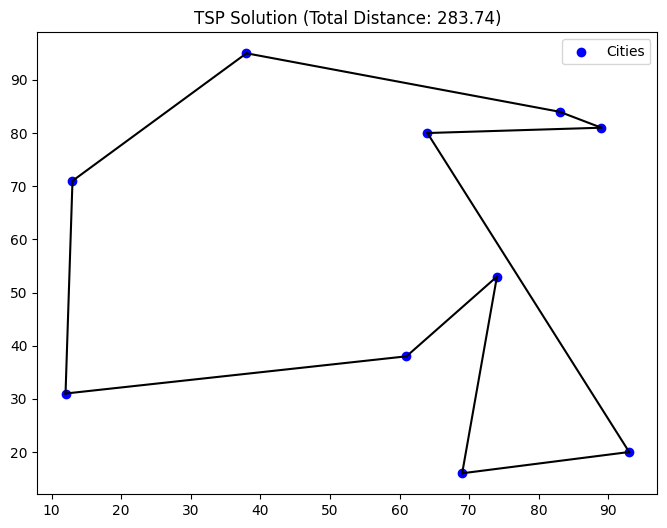

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Generate random cities with coordinates
def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

# Calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate initial random path
def generate_initial_path(num_cities):
    path = list(range(num_cities))
    random.shuffle(path)
    return path

# Hill climbing algorithm
def hill_climbing(cities, max_iterations):
    current_path = generate_initial_path(len(cities))
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbors = []
        for i in range(len(current_path)):
            for j in range(i + 1, len(current_path)):
                neighbor_path = current_path[:i] + list(reversed(current_path[i:j])) + current_path[j:]
                neighbors.append(neighbor_path)

        best_neighbor = min(neighbors, key=lambda path: calculate_total_distance(path, cities))
        best_distance = calculate_total_distance(best_neighbor, cities)

        if best_distance < current_distance:
            current_path = best_neighbor
            current_distance = best_distance
        else:
            # If no better neighbor is found, terminate
            break

    return current_path, current_distance

# Plot the cities and the optimal path
def plot_cities_and_path(cities, path):
    x, y = zip(*cities)
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, marker='o', color='b', label='Cities')
    for i in range(len(path) - 1):
        plt.plot([cities[path[i]][0], cities[path[i + 1]][0]],
                 [cities[path[i]][1], cities[path[i + 1]][1]], 'k-')
    plt.plot([cities[path[-1]][0], cities[path[0]][0]],
             [cities[path[-1]][1], cities[path[0]][1]], 'k-')
    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    num_cities = 10  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)
    optimal_path, optimal_distance = hill_climbing(cities, max_iterations)

    # Print city coordinates
    print("City Coordinates:")
    for i, city in enumerate(cities):
        print(f"City {i + 1}: ({city[0]}, {city[1]})")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print("Total Distance:", optimal_distance)

    # Plot the cities and the optimal path
    plot_cities_and_path(cities, optimal_path)


Route 1: (0, 1, 2, 3), Cost: 166.10
Route 2: (0, 1, 3, 2), Cost: 221.04
Route 3: (0, 2, 1, 3), Cost: 156.05
Route 4: (0, 2, 3, 1), Cost: 193.32
Route 5: (0, 3, 1, 2), Cost: 181.42
Route 6: (0, 3, 2, 1), Cost: 163.75
Route 7: (1, 0, 2, 3), Cost: 153.17
Route 8: (1, 0, 3, 2), Cost: 178.54
Route 9: (1, 2, 0, 3), Cost: 113.54
Route 10: (1, 2, 3, 0), Cost: 163.75
Route 11: (1, 3, 0, 2), Cost: 168.48
Route 12: (1, 3, 2, 0), Cost: 193.32
Route 13: (2, 0, 1, 3), Cost: 170.84
Route 14: (2, 0, 3, 1), Cost: 168.48
Route 15: (2, 1, 0, 3), Cost: 141.26
Route 16: (2, 1, 3, 0), Cost: 181.42
Route 17: (2, 3, 0, 1), Cost: 178.54
Route 18: (2, 3, 1, 0), Cost: 221.04
Route 19: (3, 0, 1, 2), Cost: 141.26
Route 20: (3, 0, 2, 1), Cost: 113.54
Route 21: (3, 1, 0, 2), Cost: 170.84
Route 22: (3, 1, 2, 0), Cost: 156.05
Route 23: (3, 2, 0, 1), Cost: 153.17
Route 24: (3, 2, 1, 0), Cost: 166.10

City Coordinates:
City 1: (30, 17)
City 2: (8, 65)
City 3: (7, 27)
City 4: (79, 5)

Optimal Path:
[3, 0, 2, 1]
Total Dis

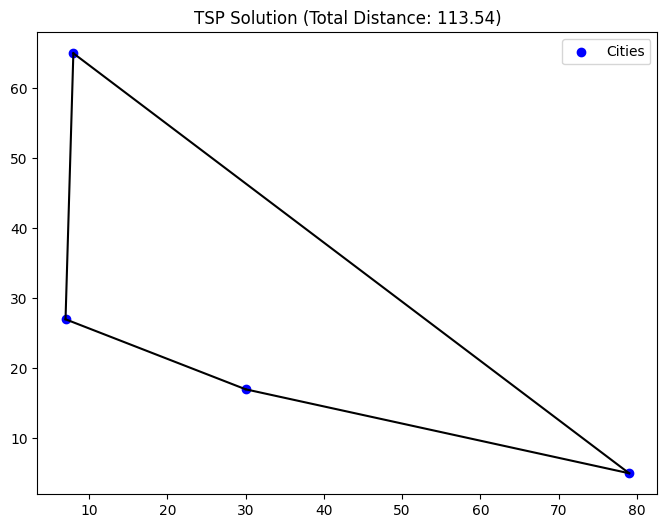

In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt

# Generate random cities with coordinates
def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

# Calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate initial random path
def generate_initial_path(num_cities):
    path = list(range(num_cities))
    random.shuffle(path)
    return path

# Hill climbing algorithm
def hill_climbing(cities, max_iterations):
    current_path = generate_initial_path(len(cities))
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbors = []
        for i in range(len(current_path)):
            for j in range(i + 1, len(current_path)):
                neighbor_path = current_path[:i] + list(reversed(current_path[i:j])) + current_path[j:]
                neighbors.append(neighbor_path)

        best_neighbor = min(neighbors, key=lambda path: calculate_total_distance(path, cities))
        best_distance = calculate_total_distance(best_neighbor, cities)

        if best_distance < current_distance:
            current_path = best_neighbor
            current_distance = best_distance
        else:
            # If no better neighbor is found, terminate
            break

    return current_path, current_distance

# Get all possible routes and their costs
def get_all_possible_routes_and_costs(cities):
    all_routes = list(itertools.permutations(range(len(cities))))
    route_costs = [calculate_total_distance(route, cities) for route in all_routes]
    return all_routes, route_costs

# Plot the cities and the optimal path
def plot_cities_and_path(cities, path):
    x, y = zip(*cities)
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, marker='o', color='b', label='Cities')
    for i in range(len(path) - 1):
        plt.plot([cities[path[i]][0], cities[path[i + 1]][0]],
                 [cities[path[i]][1], cities[path[i + 1]][1]], 'k-')
    plt.plot([cities[path[-1]][0], cities[path[0]][0]],
             [cities[path[-1]][1], cities[path[0]][1]], 'k-')
    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    num_cities = 4  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)

    # Print all possible routes and their costs
    all_routes, route_costs = get_all_possible_routes_and_costs(cities)
    for i, route in enumerate(all_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    optimal_path, optimal_distance = hill_climbing(cities, max_iterations)

    # Print city coordinates
    print("\nCity Coordinates:")
    for i, city in enumerate(cities):
        print(f"City {i + 1}: ({city[0]}, {city[1]})")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print("Total Distance:", optimal_distance)

    # Plot the cities and the optimal path
    plot_cities_and_path(cities, optimal_path)


City Coordinates:
City 1: (75, 26)
City 2: (18, 6)
City 3: (98, 99)
City 4: (82, 12)
City 5: (6, 58)
City 6: (90, 94)
City 7: (63, 38)
City 8: (70, 29)
City 9: (1, 35)
City 10: (4, 63)
City 11: (30, 42)
City 12: (16, 56)
City 13: (82, 90)
City 14: (38, 73)
City 15: (95, 63)
Enter the number of the start city (1 to 15): 1
Enter the number of the goal city (1 to 15): 2

Optimal Path:
[2, 5, 12, 14, 6, 7, 0, 3, 1, 8, 4, 9, 11, 13, 10]
Total Distance: 322.3673836388682


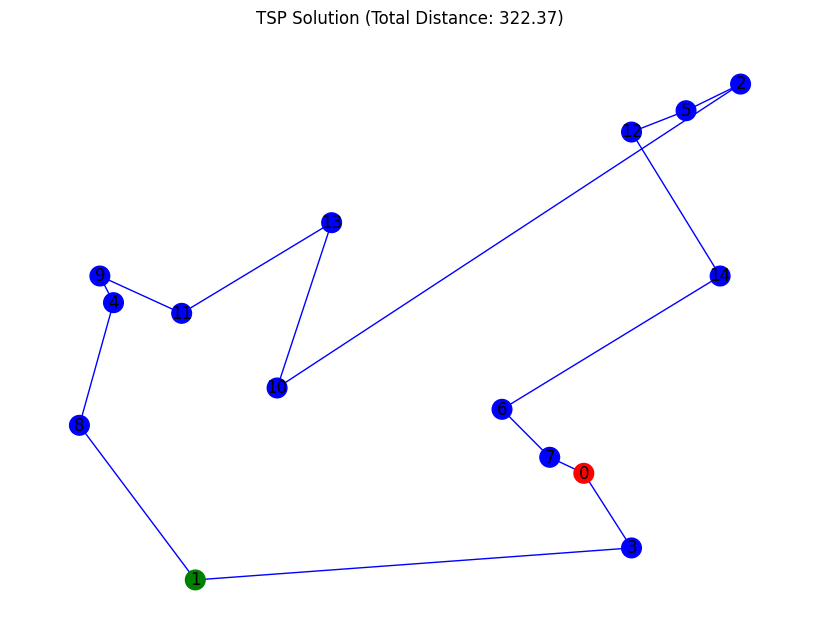

In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt
import networkx as nx

# Generate random cities with coordinates
def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

# Calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate initial random path
def generate_initial_path(num_cities):
    path = list(range(num_cities))
    random.shuffle(path)
    return path

# Hill climbing algorithm
def hill_climbing(cities, max_iterations):
    current_path = generate_initial_path(len(cities))
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbors = []
        for i in range(len(current_path)):
            for j in range(i + 1, len(current_path)):
                neighbor_path = current_path[:i] + list(reversed(current_path[i:j])) + current_path[j:]
                neighbors.append(neighbor_path)

        best_neighbor = min(neighbors, key=lambda path: calculate_total_distance(path, cities))
        best_distance = calculate_total_distance(best_neighbor, cities)

        if best_distance < current_distance:
            current_path = best_neighbor
            current_distance = best_distance
        else:
            # If no better neighbor is found, terminate
            break

    return current_path, current_distance

# Get all possible routes and their costs
def get_all_possible_routes_and_costs(cities):
    all_routes = list(itertools.permutations(range(len(cities))))
    route_costs = [calculate_total_distance(route, cities) for route in all_routes]
    return all_routes, route_costs

# Plot the cities and the optimal path using networkx
def plot_cities_and_path(cities, path, start_city, goal_city):
    G = nx.Graph()
    labels = {}
    for i, city in enumerate(cities):
        G.add_node(i, pos=city)
        labels[i] = i

    for i in range(len(path) - 1):
        G.add_edge(path[i], path[i + 1])
    G.add_edge(path[-1], path[0])

    pos = nx.get_node_attributes(G, 'pos')

    node_colors = ['red' if node == start_city else 'green' if node == goal_city else 'blue' for node in G.nodes]
    edge_colors = ['blue' for _ in G.edges]

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, with_labels=labels, node_size=200)
    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.show()

if __name__ == '__main__':
    num_cities = 15  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)

    # Print city coordinates
    print("City Coordinates:")
    for i, city in enumerate(cities):
        print(f"City {i + 1}: ({city[0]}, {city[1]})")

    # User input for start and goal cities
    start_city = int(input("Enter the number of the start city (1 to 15): ")) - 1
    goal_city = int(input("Enter the number of the goal city (1 to 15): ")) - 1

    optimal_path, optimal_distance = hill_climbing(cities, max_iterations)

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print("Total Distance:", optimal_distance)

    # Plot the cities and the optimal path
    plot_cities_and_path(cities, optimal_path, start_city, goal_city)

    # Get all possible routes and their costs
    all_routes, route_costs = get_all_possible_routes_and_costs(cities)
    print("\nAll Possible Routes and Their Costs:")
    for i, route in enumerate(all_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")


Route 1: (0, 1, 2, 3), Cost: 103.34
Route 2: (0, 1, 3, 2), Cost: 118.06
Route 3: (0, 2, 1, 3), Cost: 104.48
Route 4: (0, 2, 3, 1), Cost: 123.79
Route 5: (0, 3, 1, 2), Cost: 128.47
Route 6: (0, 3, 2, 1), Cost: 133.07
Route 7: (1, 0, 2, 3), Cost: 145.67
Route 8: (1, 0, 3, 2), Cost: 169.66
Route 9: (1, 2, 0, 3), Cost: 156.08
Route 10: (1, 2, 3, 0), Cost: 133.07
Route 11: (1, 3, 0, 2), Cost: 170.80
Route 12: (1, 3, 2, 0), Cost: 123.79
Route 13: (2, 0, 1, 3), Cost: 141.07
Route 14: (2, 0, 3, 1), Cost: 170.80
Route 15: (2, 1, 0, 3), Cost: 150.35
Route 16: (2, 1, 3, 0), Cost: 128.47
Route 17: (2, 3, 0, 1), Cost: 169.66
Route 18: (2, 3, 1, 0), Cost: 118.06
Route 19: (3, 0, 1, 2), Cost: 150.35
Route 20: (3, 0, 2, 1), Cost: 156.08
Route 21: (3, 1, 0, 2), Cost: 141.07
Route 22: (3, 1, 2, 0), Cost: 104.48
Route 23: (3, 2, 0, 1), Cost: 145.67
Route 24: (3, 2, 1, 0), Cost: 103.34
Enter the number of the start city (1 to 4): 2
Enter the number of the goal city (1 to 4): 4

City Coordinates:
City 1: (

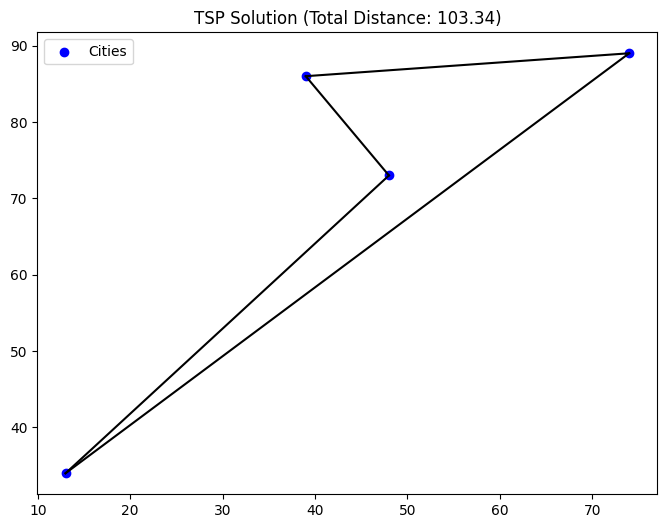

In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt

# Generate random cities with coordinates
def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

# Calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate initial random path
def generate_initial_path(num_cities):
    path = list(range(num_cities))
    random.shuffle(path)
    return path

# Hill climbing algorithm
def hill_climbing(cities, max_iterations):
    current_path = generate_initial_path(len(cities))
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbors = []
        for i in range(len(current_path)):
            for j in range(i + 1, len(current_path)):
                neighbor_path = current_path[:i] + list(reversed(current_path[i:j])) + current_path[j:]
                neighbors.append(neighbor_path)

        best_neighbor = min(neighbors, key=lambda path: calculate_total_distance(path, cities))
        best_distance = calculate_total_distance(best_neighbor, cities)

        if best_distance < current_distance:
            current_path = best_neighbor
            current_distance = best_distance
        else:
            # If no better neighbor is found, terminate
            break

    return current_path, current_distance

# Get all possible routes and their costs
def get_all_possible_routes_and_costs(cities):
    all_routes = list(itertools.permutations(range(len(cities))))
    route_costs = [calculate_total_distance(route, cities) for route in all_routes]
    return all_routes, route_costs

# Plot the cities and the optimal path
def plot_cities_and_path(cities, path):
    x, y = zip(*cities)
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, marker='o', color='b', label='Cities')
    for i in range(len(path) - 1):
        plt.plot([cities[path[i]][0], cities[path[i + 1]][0]],
                 [cities[path[i]][1], cities[path[i + 1]][1]], 'k-')
    plt.plot([cities[path[-1]][0], cities[path[0]][0]],
             [cities[path[-1]][1], cities[path[0]][1]], 'k-')
    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    num_cities = 4  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)

    # Print all possible routes and their costs
    all_routes, route_costs = get_all_possible_routes_and_costs(cities)
    for i, route in enumerate(all_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    # Allow the user to enter the start and goal city numbers
    start_city = int(input(f"Enter the number of the start city (1 to {num_cities}): ")) - 1
    goal_city = int(input(f"Enter the number of the goal city (1 to {num_cities}): ")) - 1

    optimal_path, optimal_distance = hill_climbing(cities, max_iterations)

    # Print city coordinates
    print("\nCity Coordinates:")
    for i, city in enumerate(cities):
        print(f"City {i + 1}: ({city[0]}, {city[1]})")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print("Total Distance:", optimal_distance)

    # Plot the cities and the optimal path
    plot_cities_and_path(cities, optimal_path)


In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt

# Generate random cities with coordinates
def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

# Calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate initial path from start city
def generate_initial_path(start_city, num_cities):
    path = list(range(num_cities))
    path.remove(start_city)
    path = [start_city] + random.sample(path, num_cities - 1)
    return path

# Hill climbing algorithm
def hill_climbing(cities, start_city, max_iterations):
    current_path = generate_initial_path(start_city, len(cities))
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbors = []
        for i in range(len(current_path)):
            for j in range(i + 1, len(current_path)):
                neighbor_path = current_path[:i] + list(reversed(current_path[i:j])) + current_path[j:]
                neighbors.append(neighbor_path)

        best_neighbor = min(neighbors, key=lambda path: calculate_total_distance(path, cities))
        best_distance = calculate_total_distance(best_neighbor, cities)

        if best_distance < current_distance:
            current_path = best_neighbor
            current_distance = best_distance
        else:
            # If no better neighbor is found, terminate
            break

    return current_path, current_distance

# Get all possible routes and their costs
def get_all_possible_routes_and_costs(cities):
    all_routes = list(itertools.permutations(range(len(cities))))
    route_costs = [calculate_total_distance(route, cities) for route in all_routes]
    return all_routes, route_costs

# Plot the cities and the optimal path
def plot_cities_and_path(cities, path):
    x, y = zip(*cities)
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, marker='o', color='b', label='Cities')
    for i in range(len(path) - 1):
        plt.plot([cities[path[i]][0], cities[path[i + 1]][0]],
                 [cities[path[i]][1], cities[path[i + 1]][1]], 'k-')
    plt.plot([cities[path[-1]][0], cities[path[0]][0]],
             [cities[path[-1]][1], cities[path[0]][1]], 'k-')
    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    num_cities = 4  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)

    # Print all possible routes and their costs
    all_routes, route_costs = get_all_possible_routes_and_costs(cities)
    for i, route in enumerate(all_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    # Allow the user to enter the start and goal city numbers
    start_city = int(input(f"Enter the number of the start city (1 to {num_cities}): "),- 1
    goal_city = int(input(f"Enter the number of the goal city (1 to {num_cities}): "),- 1

    optimal_path, optimal_distance = hill_climbing(cities, start_city, max_iterations)

    # Print city coordinates
    print("\nCity Coordinates:")
    for i, city in enumerate(cities):
        print(f"City {i + 1}: ({city[0]}, {city[1]})")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print("Total Distance:", optimal_distance)

    # Plot the cities and the optimal path
    plot_cities_and_path(cities, optimal_path)


SyntaxError: ignored

Route 1: (0, 1, 2, 3), Cost: 174.45
Route 2: (0, 1, 3, 2), Cost: 153.83
Route 3: (0, 2, 1, 3), Cost: 147.65
Route 4: (0, 2, 3, 1), Cost: 142.06
Route 5: (0, 3, 1, 2), Cost: 171.14
Route 6: (0, 3, 2, 1), Cost: 186.16
Route 7: (1, 0, 2, 3), Cost: 220.56
Route 8: (1, 0, 3, 2), Cost: 244.05
Route 9: (1, 2, 0, 3), Cost: 237.87
Route 10: (1, 2, 3, 0), Cost: 186.16
Route 11: (1, 3, 0, 2), Cost: 217.25
Route 12: (1, 3, 2, 0), Cost: 142.06
Route 13: (2, 0, 1, 3), Cost: 205.53
Route 14: (2, 0, 3, 1), Cost: 217.25
Route 15: (2, 1, 0, 3), Cost: 249.64
Route 16: (2, 1, 3, 0), Cost: 171.14
Route 17: (2, 3, 0, 1), Cost: 244.05
Route 18: (2, 3, 1, 0), Cost: 153.83
Route 19: (3, 0, 1, 2), Cost: 249.64
Route 20: (3, 0, 2, 1), Cost: 237.87
Route 21: (3, 1, 0, 2), Cost: 205.53
Route 22: (3, 1, 2, 0), Cost: 147.65
Route 23: (3, 2, 0, 1), Cost: 220.56
Route 24: (3, 2, 1, 0), Cost: 174.45
Enter the number of the start city (1 to 4): 3
Enter the number of the goal city (1 to 4): 2

City Coordinates:
City 1: (

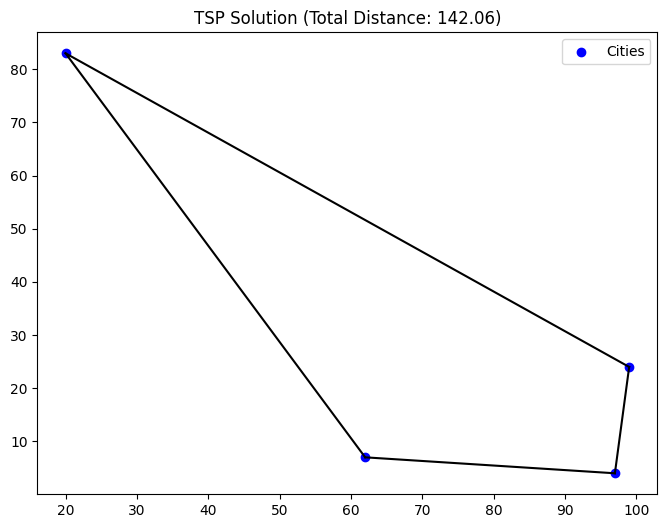

In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt

# Generate random cities with coordinates
def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

# Calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate initial path from start city
def generate_initial_path(start_city, num_cities):
    path = list(range(num_cities))
    path.remove(start_city)
    path = [start_city] + random.sample(path, num_cities - 1)
    return path

# Hill climbing algorithm
def hill_climbing(cities, start_city, max_iterations):
    current_path = generate_initial_path(start_city, len(cities))
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbors = []
        for i in range(len(current_path)):
            for j in range(i + 1, len(current_path)):
                neighbor_path = current_path[:i] + list(reversed(current_path[i:j])) + current_path[j:]
                neighbors.append(neighbor_path)

        best_neighbor = min(neighbors, key=lambda path: calculate_total_distance(path, cities))
        best_distance = calculate_total_distance(best_neighbor, cities)

        if best_distance < current_distance:
            current_path = best_neighbor
            current_distance = best_distance
        else:
            # If no better neighbor is found, terminate
            break

    return current_path, current_distance

# Get all possible routes and their costs
def get_all_possible_routes_and_costs(cities):
    all_routes = list(itertools.permutations(range(len(cities))))
    route_costs = [calculate_total_distance(route, cities) for route in all_routes]
    return all_routes, route_costs

# Plot the cities and the optimal path
def plot_cities_and_path(cities, path):
    x, y = zip(*cities)
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, marker='o', color='b', label='Cities')
    for i in range(len(path) - 1):
        plt.plot([cities[path[i]][0], cities[path[i + 1]][0]],
                 [cities[path[i]][1], cities[path[i + 1]][1]], 'k-')
    plt.plot([cities[path[-1]][0], cities[path[0]][0]],
             [cities[path[-1]][1], cities[path[0]][1]], 'k-')
    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    num_cities = 4  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)

    # Print all possible routes and their costs
    all_routes, route_costs = get_all_possible_routes_and_costs(cities)
    for i, route in enumerate(all_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    # Allow the user to enter the start and goal city numbers
    start_city = int(input(f"Enter the number of the start city (1 to {num_cities}): ")) - 1
    goal_city = int(input(f"Enter the number of the goal city (1 to {num_cities}): "))- 1


    optimal_path, optimal_distance = hill_climbing(cities, start_city, max_iterations)

    # Print city coordinates
    print("\nCity Coordinates:")
    for i, city in enumerate(cities):
        print(f"City {i + 1}: ({city[0]}, {city[1]})")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print("Total Distance:", optimal_distance)

    # Plot the cities and the optimal path
    plot_cities_and_path(cities, optimal_path)


Route 1: (0, 1, 2, 3), Cost: 144.60
Route 2: (0, 1, 3, 2), Cost: 135.89
Route 3: (0, 2, 1, 3), Cost: 127.47
Route 4: (0, 2, 3, 1), Cost: 74.31
Route 5: (0, 3, 1, 2), Cost: 134.00
Route 6: (0, 3, 2, 1), Cost: 89.55
Route 7: (1, 0, 2, 3), Cost: 89.41
Route 8: (1, 0, 3, 2), Cost: 95.94
Route 9: (1, 2, 0, 3), Cost: 87.52
Route 10: (1, 2, 3, 0), Cost: 89.55
Route 11: (1, 3, 0, 2), Cost: 78.82
Route 12: (1, 3, 2, 0), Cost: 74.31
Route 13: (2, 0, 1, 3), Cost: 133.86
Route 14: (2, 0, 3, 1), Cost: 78.82
Route 15: (2, 1, 0, 3), Cost: 149.10
Route 16: (2, 1, 3, 0), Cost: 134.00
Route 17: (2, 3, 0, 1), Cost: 95.94
Route 18: (2, 3, 1, 0), Cost: 135.89
Route 19: (3, 0, 1, 2), Cost: 149.10
Route 20: (3, 0, 2, 1), Cost: 87.52
Route 21: (3, 1, 0, 2), Cost: 133.86
Route 22: (3, 1, 2, 0), Cost: 127.47
Route 23: (3, 2, 0, 1), Cost: 89.41
Route 24: (3, 2, 1, 0), Cost: 144.60
Enter the number of the start city (1 to 4): 1
Enter the number of the goal city (1 to 4): 3

City Coordinates:
City 1: (49, 94)
City

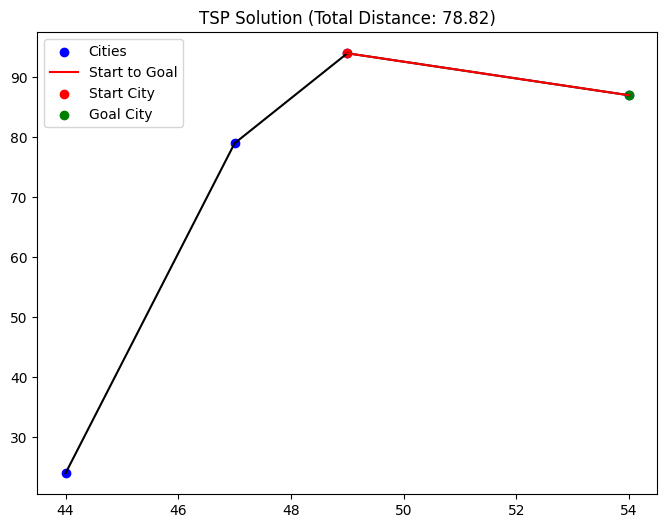

In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt

# Generate random cities with coordinates
def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

# Calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate initial path from start city
def generate_initial_path(start_city, goal_city, num_cities):
    path = list(range(num_cities))
    path.remove(start_city)
    path.remove(goal_city)
    path = [start_city] + random.sample(path, num_cities - 2) + [goal_city]
    return path

# Hill climbing algorithm
def hill_climbing(cities, start_city, goal_city, max_iterations):
    current_path = generate_initial_path(start_city, goal_city, len(cities))
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbors = []
        for i in range(len(current_path)):
            for j in range(i + 1, len(current_path)):
                neighbor_path = current_path[:i] + list(reversed(current_path[i:j])) + current_path[j:]
                neighbors.append(neighbor_path)

        best_neighbor = min(neighbors, key=lambda path: calculate_total_distance(path, cities))
        best_distance = calculate_total_distance(best_neighbor, cities)

        if best_distance < current_distance:
            current_path = best_neighbor
            current_distance = best_distance
        else:
            # If no better neighbor is found, terminate
            break

    return current_path, current_distance

# Get all possible routes and their costs
def get_all_possible_routes_and_costs(cities):
    all_routes = list(itertools.permutations(range(len(cities))))
    route_costs = [calculate_total_distance(route, cities) for route in all_routes]
    return all_routes, route_costs

# Plot the cities, the optimal path, and start/goal cities
def plot_cities_and_path(cities, path, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(8, 6))

    # Plot cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot the optimal path in black
    for i in range(len(path) - 1):
        plt.plot([cities[path[i]][0], cities[path[i + 1]][0]],
                 [cities[path[i]][1], cities[path[i + 1]][1]], 'k-')

    # Plot a line connecting start and goal cities in red
    plt.plot([cities[start_city][0], cities[goal_city][0]],
             [cities[start_city][1], cities[goal_city][1]], 'r-', label='Start to Goal')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    num_cities = 4  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)

    # Print all possible routes and their costs
    all_routes, route_costs = get_all_possible_routes_and_costs(cities)
    for i, route in enumerate(all_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    # Allow the user to enter the start and goal city numbers
    start_city = int(input(f"Enter the number of the start city (1 to {num_cities}): "))
    goal_city = int(input(f"Enter the number of the goal city (1 to {num_cities}): "))

    optimal_path, optimal_distance = hill_climbing(cities, start_city, goal_city, max_iterations)

    # Print city coordinates
    print("\nCity Coordinates:")
    for i, city in enumerate(cities):
        print(f"City {i + 1}: ({city[0]}, {city[1]})")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print("Total Distance:", optimal_distance)

    # Plot the cities, the optimal path, and the start/goal cities
    plot_cities_and_path(cities, optimal_path, start_city, goal_city)
